In [1]:
# MNIST dataset

In [15]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.initializers import RandomNormal
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
%matplotlib notebook
%matplotlib inline

In [16]:
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4 <= Dynamic plotting
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    fig.canvas.draw()
    

In [17]:
# loading train-test data from keras mnist dataset
(X_train, y_train),(X_test, y_test) = mnist.load_data()

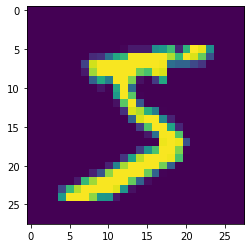

In [18]:
plt.imshow(X_train[0])

In [19]:
print("Training dataset shape",X_train.shape,' and ' ,y_train.shape)
print("Test dataset shape" , X_test.shape, ' and ',y_test.shape)
print("Training dataset have 60K images of 28x28 size and Test dataset have 10K images of 28x28 size.")

Training dataset shape (60000, 28, 28)  and  (60000,)
Test dataset shape (10000, 28, 28)  and  (10000,)
Training dataset have 60K images of 28x28 size and Test dataset have 10K images of 28x28 size.


In [20]:
# input is  2 dimensional vector(28x28 image)
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
print("Training dataset shape",X_train.shape,' and ' ,y_train.shape)
print("Test dataset shape" , X_test.shape, ' and ',y_test.shape)
print("Training dataset have 60K images of 1x784 size and Test dataset have 10K images of 1x784 size.")

Training dataset shape (60000, 784)  and  (60000,)
Test dataset shape (10000, 784)  and  (10000,)
Training dataset have 60K images of 1x784 size and Test dataset have 10K images of 1x784 size.


In [21]:
# printing datapoint
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

### We can see the values in X_train[0] lies between 0 to 255 but so to apply any Neural Network algorithms we need to normlize it


In [22]:
# normlizing dataset
X_train = X_train/255.0
X_test = X_test/255.0
print("50 values from X_train[0]",X_train[0][140:160])
print("Now each values lies between 0 to 1")

50 values from X_train[0] [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.01176471 0.07058824 0.07058824 0.07058824 0.49411765 0.53333333
 0.68627451 0.10196078]
Now each values lies between 0 to 1


In [23]:
# we have output as number between 0 to 9
# we have to make it vector (OneHotEncoding)
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test,10)
print("After converting the output into a vector : ",y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# **Softmax** **Classifier**

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Activation
# we can create sequential model by just adding layers like stack
# model parameter
output_dim = 10
input_dim = X_train.shape[1]
batch_size = 128
nb_epoch = 20

In [25]:
# creating sequential model
model = Sequential()

# The first layer in a Sequential model should know input shape 
# only the first should know input shape because following layers can do automatic shape inference)
# output_dim represent the number of nodes need in that layer
# here we have 10 nodes

# we will use softmax because we are using multiclass classification

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [26]:
# Before training a model, you need to configure the learning process, which is done via the compile method

# It receives three arguments:
# An optimizer. This could be the string identifier of an existing optimizer , https://keras.io/optimizers/
# A loss function. This is the objective that the model will try to minimize., https://keras.io/losses/
# A list of metrics. For any classification problem you will want to set this to metrics=['accuracy'].  https://keras.io/metrics/

model.compile(optimizer='sgd',loss="categorical_crossentropy", metrics=['accuracy'])

# fitting model on dataset
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test)) 

Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 1.3035 - accuracy: 0.6797 - val_loss: 0.8150 - val_accuracy: 0.8328
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.7191 - accuracy: 0.8396 - val_loss: 0.6074 - val_accuracy: 0.8615
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.5882 - accuracy: 0.8584 - val_loss: 0.5255 - val_accuracy: 0.8732
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.5259 - accuracy: 0.8684 - val_loss: 0.4796 - val_accuracy: 0.8811
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4880 - accuracy: 0.8748 - val_loss: 0.4498 - val_accuracy: 0.8855
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4621 - accuracy: 0.8799 - val_loss: 0.4287 - val_accuracy: 0.8896
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4428 - accuracy: 0.8841 - val_loss: 0.4128 - val_accuracy: 0.8936
Epoch 

Test score: 0.3362504839897156
Test accuracy: 0.9093000292778015


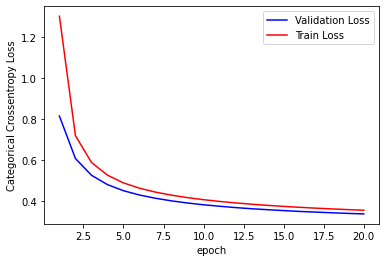

In [27]:
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
